In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Inlezen van de dataset
data = pd.read_excel("C:/Users/20201954/Desktop/data/merged_data_MRI_isolation_forest.xlsx")
data.replace(',', '.', regex=True, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

Accuracy: 75.11%

Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.73      0.73        30
           2       0.77      0.92      0.84        26
           3       0.72      0.79      0.75        29
           4       0.65      0.62      0.63        21
           5       0.57      0.53      0.55        15
           6       0.74      0.69      0.71        29
           7       0.71      0.56      0.62        36
           8       0.76      0.83      0.79        35
           9       0.80      0.73      0.76        33
          10       0.74      0.86      0.79        29
          11       0.54      0.86      0.67        22
          12       0.75      0.54      0.62        28
          13       0.57      0.48      0.52        33
          14       0.84      0.57      0.68        28
          15       0.62      0.71      0.67        28
          16       0.85      0.77      0.81        30
          17       0.77      0.72      

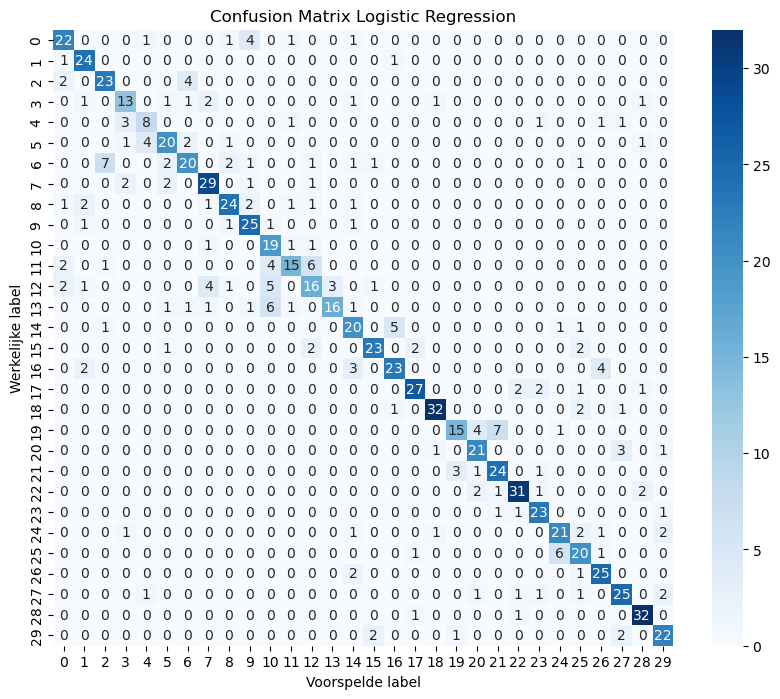

In [11]:
# Selecteer features en target
X = data.drop(columns=['muscleID'])  # Alle kolommen behalve 'muscleID' (target)
y = data['muscleID']  # De target (muscleID)

# Splits de data in een train- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliseer de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Stap 2: Train een Logistic Regression-model
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)

# Maak voorspellingen op de testset
y_pred = logistic_model.predict(X_test_scaled)

# Stap 3: Evaluatie van het model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix plotten
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Voorspelde label')
plt.ylabel('Werkelijke label')
plt.title('Confusion Matrix Logistic Regression')
plt.show()